### Importing the necessary Libraries

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
iris = load_iris() #Load the iris dataset

### Creating a dataframe and adding needed columns

In [3]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df['target'] = iris.target
df['target_names'] = df['target'].apply(lambda x:iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


### Seperating the three types into three dataframes

In [4]:
df_setosa = df[df.target==0]
df_versicolor = df[df.target==1]
df_virginica = df[df.target==2]

### Sepal Length vs Sepal Width for all 3 types

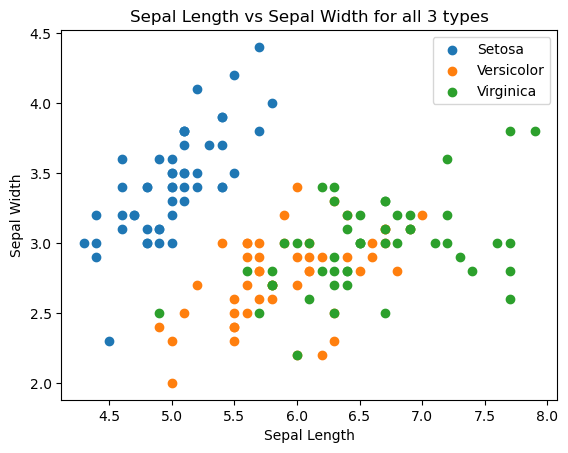

In [5]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length vs Sepal Width for all 3 types')
plt.scatter(df_setosa['sepal length (cm)'],df_setosa['sepal width (cm)'],label="Setosa")
plt.scatter(df_versicolor['sepal length (cm)'],df_versicolor['sepal width (cm)'],label="Versicolor")
plt.scatter(df_virginica['sepal length (cm)'],df_virginica['sepal width (cm)'],label="Virginica")
plt.legend()
plt.show()

### Petal Length vs Petal Width for all 3 types

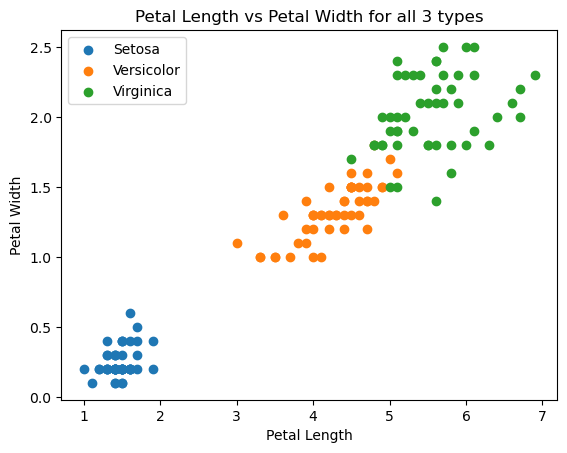

In [6]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal Length vs Petal Width for all 3 types')
plt.scatter(df_setosa['petal length (cm)'],df_setosa['petal width (cm)'],label="Setosa")
plt.scatter(df_versicolor['petal length (cm)'],df_versicolor['petal width (cm)'],label="Versicolor")
plt.scatter(df_virginica['petal length (cm)'],df_virginica['petal width (cm)'],label="Virginica")
plt.legend()
plt.show()

### Preparing the training and testing dataset

In [7]:
X = df.drop(['target','target_names'],axis='columns')
Y = df.target
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y)

### Logistic Regression

Accuracy: 0.9333333333333333

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.80      0.89        10
   virginica       0.83      1.00      0.91        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



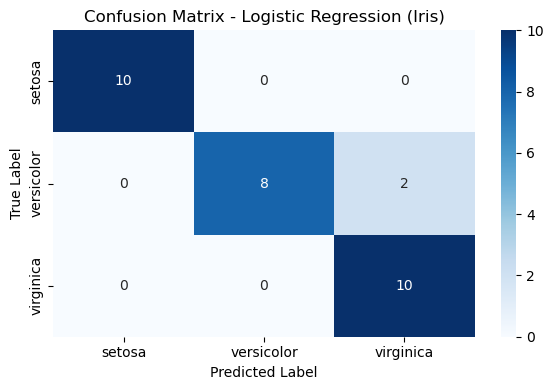

In [8]:
logistic_regression_model = LogisticRegression(max_iter=200)
logistic_regression_model.fit(X_train, Y_train)
Y_pred_logistic_regression = logistic_regression_model.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, Y_pred_logistic_regression))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred_logistic_regression, target_names=iris.target_names))

cm = confusion_matrix(Y_test, Y_pred_logistic_regression)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Regression (Iris)')
plt.tight_layout()
plt.show()

### Random Forest

Accuracy: 0.9333333333333333

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.80      0.89        10
   virginica       0.83      1.00      0.91        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



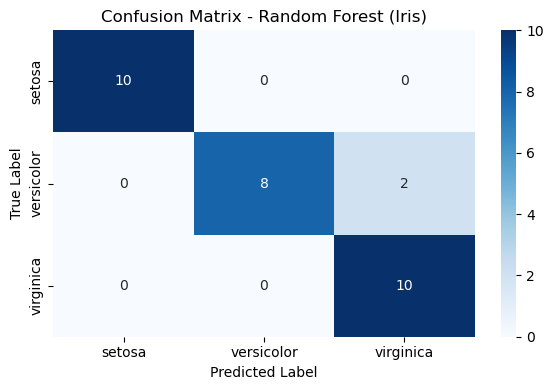

In [9]:
random_forest_model = RandomForestClassifier(n_estimators=100)
random_forest_model.fit(X_train, Y_train)
Y_pred_random_forest = random_forest_model.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, Y_pred_random_forest))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred_random_forest, target_names=iris.target_names))

cm = confusion_matrix(Y_test, Y_pred_random_forest)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest (Iris)')
plt.tight_layout()
plt.show()

### Support Vector Machine

Accuracy: 0.9666666666666667

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



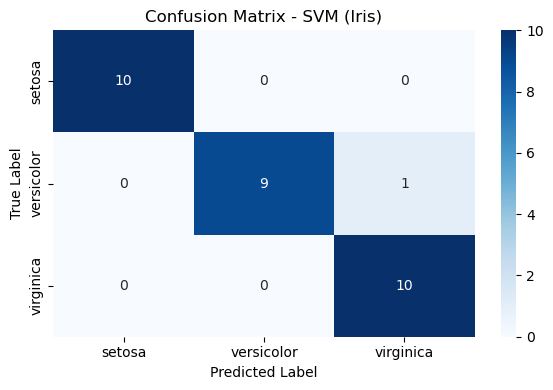

In [10]:
svc_model = SVC(kernel='linear') 
svc_model.fit(X_train, Y_train)
Y_pred_svc = svc_model.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, Y_pred_svc))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred_svc, target_names=iris.target_names))

cm = confusion_matrix(Y_test, Y_pred_svc)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - SVM (Iris)')
plt.tight_layout()
plt.show()

### Decision Tree

Accuracy: 0.9

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.89      0.80      0.84        10
   virginica       0.82      0.90      0.86        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



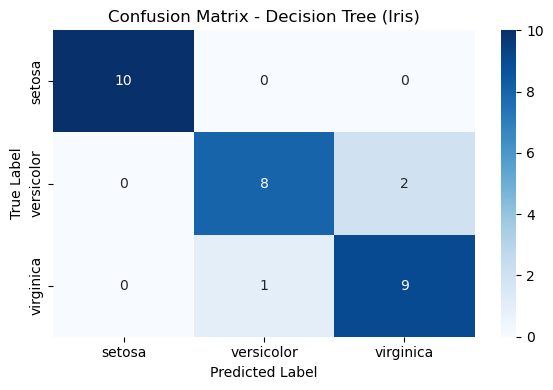

In [11]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, Y_train)
Y_pred_dt = dt_model.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, Y_pred_dt))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred_dt, target_names=iris.target_names))

cm = confusion_matrix(Y_test, Y_pred_dt)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Decision Tree (Iris)')
plt.tight_layout()
plt.show()

### Gaussian Naive Bayes

Accuracy: 0.9

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.89      0.80      0.84        10
   virginica       0.82      0.90      0.86        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



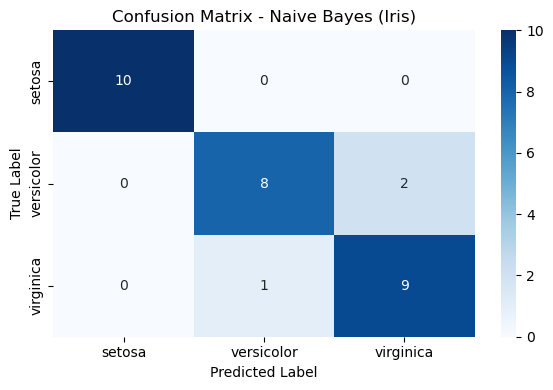

In [12]:
gnb_model = DecisionTreeClassifier(random_state=42)
gnb_model.fit(X_train, Y_train)
Y_pred_gnb = gnb_model.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, Y_pred_gnb))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred_gnb, target_names=iris.target_names))

cm = confusion_matrix(Y_test, Y_pred_gnb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Naive Bayes (Iris)')
plt.tight_layout()
plt.show()